In [1]:
# The ``inline`` flag will use the appropriate backend to make figures appear inline in the notebook.  
%matplotlib inline

import pandas as pd
import numpy as np

# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt

# import seaborn library (wrapper of matplotlib)
import seaborn as sns

## Matplotlib Wrappers (Pandas and Seaborn)

Matplotlib is a very popular visualization library, but it definitely has flaws.

1. Matplotlib defaults are not ideal (no grid lines, white background etc).
2. The library is relatively low level. Doing anything complicated takes quite a bit of code. 
3. Lack of integration with pandas data structures (though this is being improved).

In this video, we are going to make a more complicated visualization called a boxplot to show how helpful it is to work with the matplotlib wrappers pandas and seaborn.

### What is a boxplot
![](images/boxplot.png)
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. If you want to learn more about how boxplots, you can learn more [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51). 

### Load Data

The data used to demonstrate boxplots is the Breast Cancer Wisconsin (Diagnostic) Data Set: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). The goal of the visualization is to show how the distributions for the column `area_mean` differs for benign versus malignant `diagnosis`. 

In [2]:
# Load wisconsin breast cancer dataset
# either benign or malignant
cancer_df = pd.read_csv('data/wisconsinBreastCancer.csv')

In [3]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Looking at the Distribution of the Dataset in terms of Diagnosis
cancer_df['diagnosis'].value_counts(dropna = False)

diagnosis
B    357
M    212
Name: count, dtype: int64

### Plotting using Matplotlib

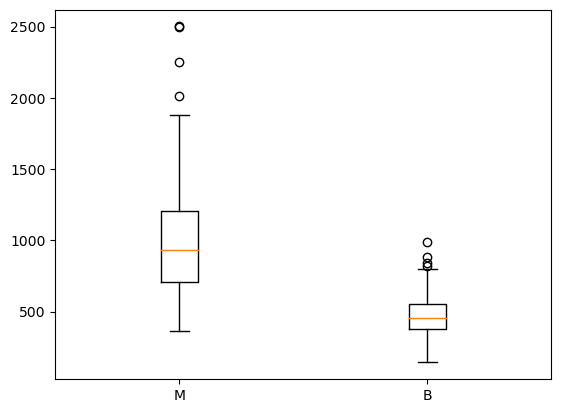

In [5]:
malignant = cancer_df.loc[cancer_df['diagnosis']=='M','area_mean'].values
benign = cancer_df.loc[cancer_df['diagnosis']=='B','area_mean'].values

plt.boxplot([malignant,benign], labels=['M', 'B']);

### Plotting using Pandas
Pandas can be used as a wrapper around Matplotlib. One reason why you might want to plot using Pandas is that it requires less code. 

We are going to create a boxplot to show how much less syntax you need to create the plot with pandas vs pure matplotlib. 

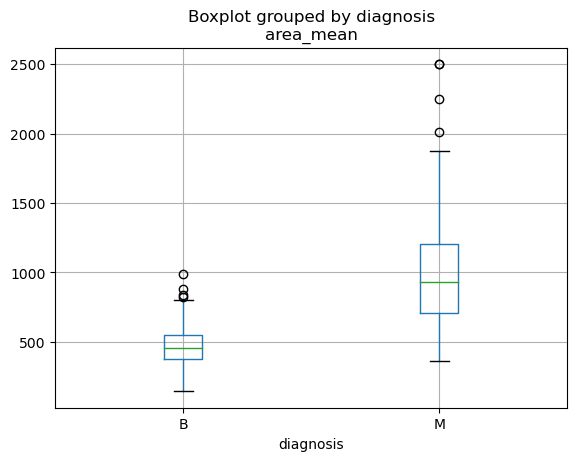

In [6]:
# Getting rid of area_mean 
cancer_df.boxplot(column = 'area_mean', by = 'diagnosis');

Sometimes you will find it useful to use Matplotlib syntax to adjust the final plot output. The code below removes the suptitle and title using pure matplotlib syntax. 

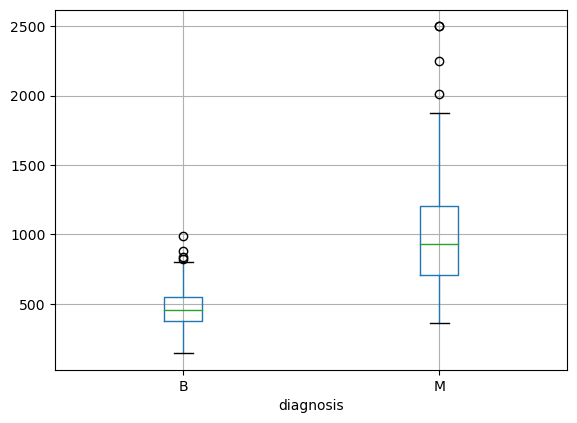

In [7]:
# Same plot but without the area_mean subtitle and title
cancer_df.boxplot(column = 'area_mean', by = 'diagnosis');
plt.title('');
plt.suptitle('');

### Plotting using Seaborn
Seaborn can be seen as a wrapper on top of Matplotlib. [Seaborn's website](https://seaborn.pydata.org/introduction.html) lists a bunch of advantages of using Seaborn including

* Close integration with pandas data structures
* Dataset oriented API for examining relationships between multiple variables. 
* Specialized support for using categorical variables to show observations or aggregate statistics. 
* Concise control over matplotlib figure styling with several built-in themes. 
* Tools for choosing color palettes that faithfully reveal patterns in your data. 

<Axes: xlabel='diagnosis', ylabel='area_mean'>

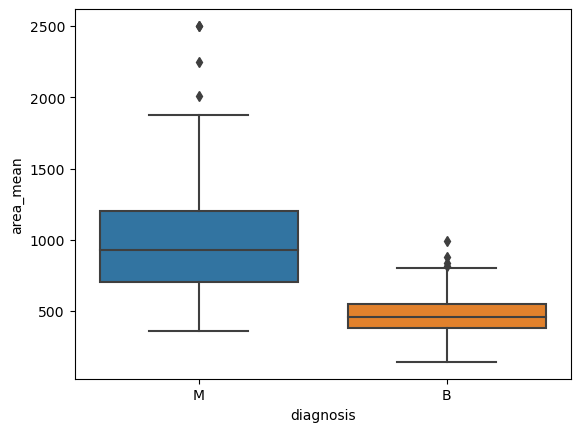

In [8]:
import seaborn as sns

sns.boxplot(x='diagnosis', y='area_mean', data=cancer_df)

1. Create a visualization comparing car interest payments on 3,5,7, and 10% fixed rate loans. 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


670.08

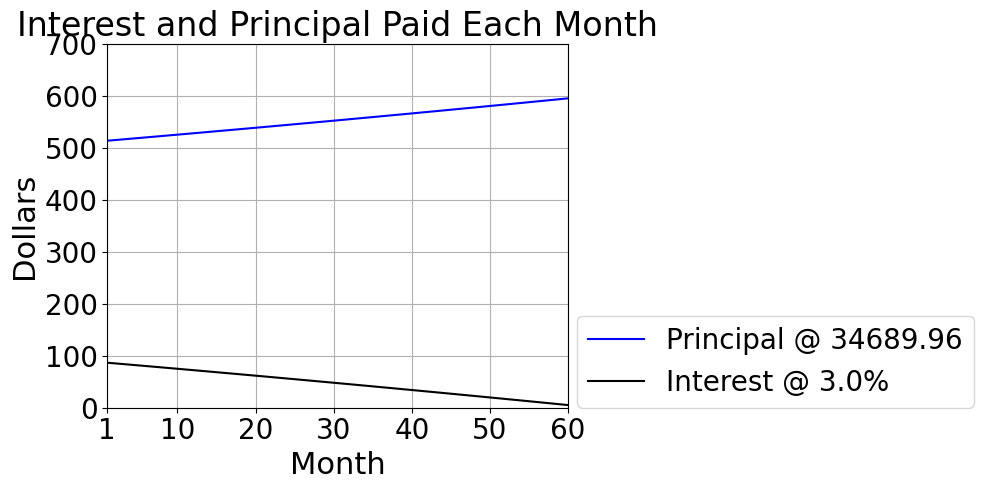

In [29]:
# emi @ 3%

P3 = 34689.96 * (1.075)
r3 = 0.03 / 12
n3 = 60
numerator3 = (r3 *((1 + r3)**(n3)) )
denominator3 = ((1 + r3)**(n3)) - 1
emi3 = P3 * (numerator3 / denominator3)
np.round(emi3,2)

#interest rate @ 3%

term = 60
P = 34689.96
interest_rate = .03

def calc_interest(P,emi,interest_rate):
    interest_paid = np.floor(((interest_rate/12)*P)*100)/100
    principal_paid = np.round(emi-interest_paid, 2)
    new_balance = np.round(P - principal_paid,2)
    return(emi, interest_paid, principal_paid, new_balance)

payment_list = []
for n in range(1, term + 1):
    emi3,i_paid,p_paid,new_p = calc_interest(P, emi3, interest_rate)
    payment_list.append([n, P, emi3, i_paid, p_paid, new_p])
    p = np.round(new_p,2)
    
# Plot Information @ 3%

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(payment_table['Month'], payment_table['Principal Paid'], c = 'b', label = f'Principal @ {P}');
axes.plot(payment_table['Month'], payment_table['Interest Paid'], c = 'k', label = f'Interest @ {interest_rate*100}%');

axes.set_xlim((1, 60));
axes.set_xticks([1, 10, 20, 30, 40, 50, 60])
axes.set_ylim((0, 700));
axes.set_ylabel('Dollars', fontsize = 22);
axes.set_xlabel('Month', fontsize = 22);

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
axes.set_title('Interest and Principal Paid Each Month', fontsize = 24)

plt.legend(bbox_to_anchor=(1.02,0), loc="lower left", borderaxespad=0, fontsize = 20)
plt.tight_layout()
plt.grid(axis = 'both')


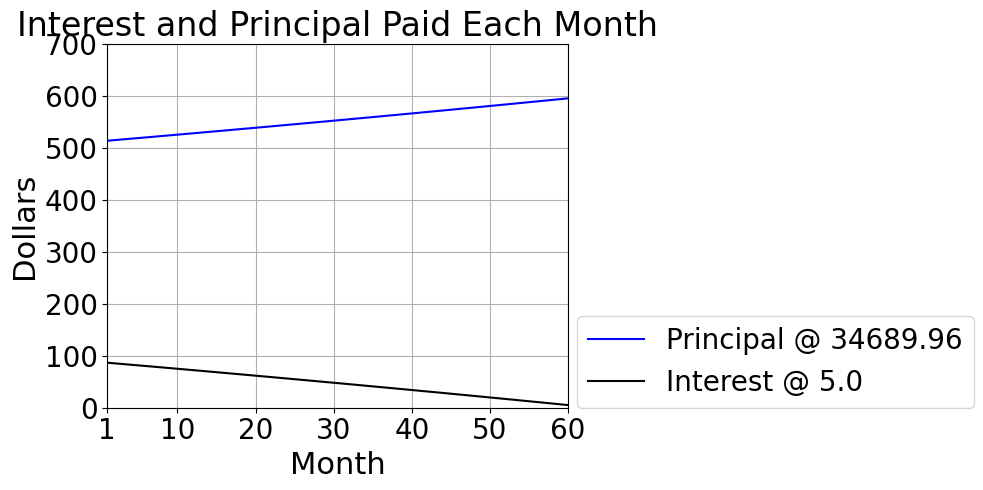

In [28]:
# emi @ 5%

P3 = 34689.96 * (1.075)
r3 = 0.05 / 12
n3 = 60
numerator3 = (r3 *((1 + r3)**(n3)) )
denominator3 = ((1 + r3)**(n3)) - 1
emi3 = P3 * (numerator3 / denominator3)
np.round(emi3,2)

#interest rate @ 5%

term = 60
P = 34689.96
interest_rate = .05

def calc_interest(P,emi,interest_rate):
    interest_paid = np.floor(((interest_rate/12)*P)*100)/100
    principal_paid = np.round(emi-interest_paid, 2)
    new_balance = np.round(P - principal_paid,2)
    return(emi, interest_paid, principal_paid, new_balance)

payment_list = []
for n in range(1, term + 1):
    emi3,i_paid,p_paid,new_p = calc_interest(P, emi3, interest_rate)
    payment_list.append([n, P, emi3, i_paid, p_paid, new_p])
    P = np.round(new_p,2)
    
# Plot Information @ 3%

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(payment_table['Month'], payment_table['Principal Paid'], c = 'b', label = f'Principal @ {P}');
axes.plot(payment_table['Month'], payment_table['Interest Paid'], c = 'k', label = f'Interest @ {interest_rate*100}%');

axes.set_xlim((1, 60));
axes.set_xticks([1, 10, 20, 30, 40, 50, 60])
axes.set_ylim((0, 700));
axes.set_ylabel('Dollars', fontsize = 22);
axes.set_xlabel('Month', fontsize = 22);

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
axes.set_title('Interest and Principal Paid Each Month', fontsize = 24)

plt.legend(bbox_to_anchor=(1.02,0), loc="lower left", borderaxespad=0, fontsize = 20)
plt.tight_layout()
plt.grid(axis = 'both')



2. Create a visualization comparing home loan interest payments with 30 year term and 3,5,7, and 10% fixed rate loans.



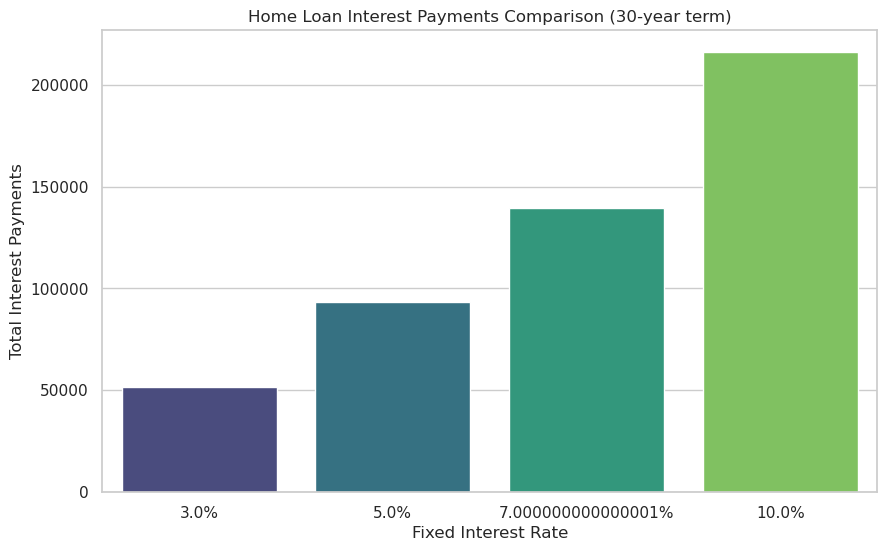

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loan amount
loan_amount = 100000  # You can adjust this as needed

# Loan terms
loan_term_years = 30

# Interest rates
interest_rates = [0.03, 0.05, 0.07, 0.10]

# Calculate monthly payments for each interest rate
monthly_interest_payments = []
for rate in interest_rates:
    monthly_interest_rate = rate / 12
    num_payments = loan_term_years * 12
    monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate)**num_payments) / ((1 + monthly_interest_rate)**num_payments - 1)
    monthly_interest_payments.append(monthly_payment * num_payments - loan_amount)

# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=[f"{rate*100}%" for rate in interest_rates], y=monthly_interest_payments, palette="viridis")
plt.title(f"Home Loan Interest Payments Comparison (30-year term)")
plt.xlabel("Fixed Interest Rate")
plt.ylabel("Total Interest Payments")
plt.show()

3. (bonus hard question if you get bored) Assuming you got an 6% fixed 30 year home loan, and you refinance the loan 5 years into the loan at 5% fixed, what would be the difference in total interest payed between the loans. 

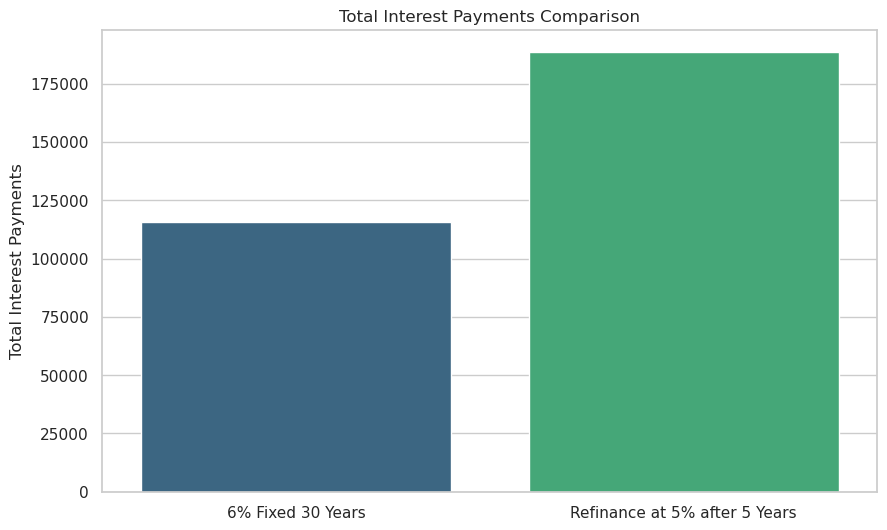

Difference in total interest paid: $72766.23


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loan amount
loan_amount = 100000  # You can adjust this as needed

# Loan term for each scenario
loan_term_years = 30
refinance_years = 5

# Interest rates for each scenario
initial_rate = 0.06
refinance_rate = 0.05

# Calculate total interest payments for the first scenario (6% fixed for 30 years)
monthly_interest_rate_1 = initial_rate / 12
num_payments_1 = loan_term_years * 12
monthly_payment_1 = loan_amount * (monthly_interest_rate_1 * (1 + monthly_interest_rate_1)**num_payments_1) / ((1 + monthly_interest_rate_1)**num_payments_1 - 1)
total_interest_1 = monthly_payment_1 * num_payments_1 - loan_amount

# Calculate total interest payments for the second scenario (refinance at 5% fixed after 5 years)
monthly_interest_rate_2 = refinance_rate / 12
num_payments_refinance = (loan_term_years - refinance_years) * 12
monthly_payment_2_refinance = loan_amount * (monthly_interest_rate_2 * (1 + monthly_interest_rate_2)**num_payments_refinance) / ((1 + monthly_interest_rate_2)**num_payments_refinance - 1)
total_interest_2_refinance = monthly_payment_2_refinance * num_payments_refinance - loan_amount

# Add interest payments for the remaining period (after refinance)
num_payments_remaining = refinance_years * 12
monthly_payment_2_remaining = loan_amount * (monthly_interest_rate_2 * (1 + monthly_interest_rate_2)**num_payments_remaining) / ((1 + monthly_interest_rate_2)**num_payments_remaining - 1)
total_interest_2_remaining = monthly_payment_2_remaining * num_payments_remaining

total_interest_2 = total_interest_2_refinance + total_interest_2_remaining

# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=['6% Fixed 30 Years', 'Refinance at 5% after 5 Years'], y=[total_interest_1, total_interest_2], palette="viridis")
plt.title("Total Interest Payments Comparison")
plt.ylabel("Total Interest Payments")
plt.show()

# Calculate the difference in total interest paid
difference_in_interest = total_interest_2 - total_interest_1
print(f"Difference in total interest paid: ${difference_in_interest:.2f}")